In [4]:
# Import helpful libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm,metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn import preprocessing
from sklearn.svm import SVC
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

Load the data, and separate the target

In [5]:
file_path = '../content/sample_data/diabetes.csv'
patient_data = pd.read_csv(file_path)
label_encoder = preprocessing.LabelEncoder()

for column in patient_data.columns[1:]:
    patient_data[column] =  label_encoder.fit_transform(patient_data[column])
    
X = patient_data.drop(columns="class",axis=1)


Data Standardization 

In [6]:
#after standaridization all the data are almost in the simillar range
scaler=StandardScaler()
standardized_data=scaler.fit_transform(X)
X=standardized_data
Y = patient_data['class']

(416,)


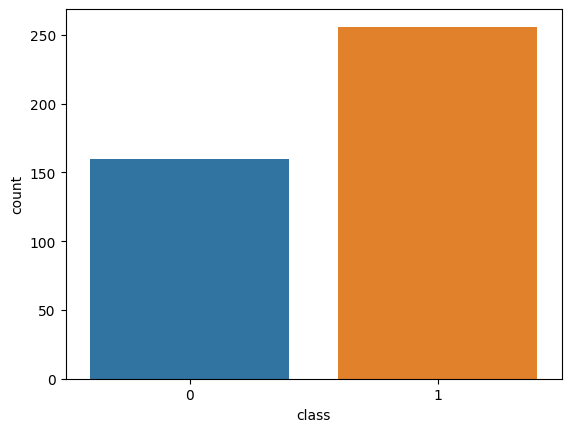

In [7]:
# Split into validation and training data
train_X, val_X, train_Y, val_Y = train_test_split(X,Y,test_size=0.2,stratify=Y, random_state=1)
sns.countplot(x=train_Y); 
print(train_Y.shape)

Training Model SVM

In [8]:
svm_model=svm.SVC(kernel="linear")
svm_model.fit(train_X,train_Y)
SVM_predicition=svm_model.predict(val_X)
svm_accuracy=accuracy_score(SVM_predicition,val_Y)
# Compute confusion matrix
cm = confusion_matrix(val_Y,SVM_predicition)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate sensitivity (true positive rate)
svm_sensitivity = TP / (TP + FN)

# Calculate specificity (true negative rate)
svm_specificity = TN / (TN + FP)

print("Sensitivity:", svm_sensitivity)
print("Specificity:", svm_specificity)
print("accuracy",svm_accuracy)

Sensitivity: 0.953125
Specificity: 0.9
accuracy 0.9326923076923077


Confusion Matrix for SVM

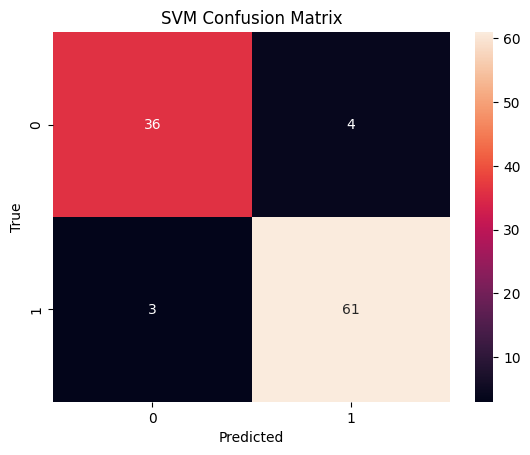

In [9]:
sns.heatmap(confusion_matrix(val_Y,SVM_predicition), annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')
plt.show()

Training Model XGBoosting


In [22]:
xgb_model=xgb.XGBClassifier()
xgb_model.fit(train_X, train_Y)
xgb_prediction = xgb_model.predict(val_X)
xgb_accuracy=accuracy_score(xgb_prediction ,val_Y)

# Convert probabilities to binary predictions
binary_predictions = (xgb_prediction > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(val_Y, binary_predictions)

# Extract TP, TN, FP, FN from the confusion matrix
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate sensitivity (true positive rate)
xgb_sensitivity = TP / (TP + FN)

# Calculate specificity (true negative rate)
xgb_specificity = TN / (TN + FP)

print("Sensitivity:", xgb_sensitivity)
print("Specificity:", xgb_specificity)
print("Accuracy:",xgb_accuracy)

Sensitivity: 0.984375
Specificity: 1.0
Accuracy: 0.9903846153846154


Confusion Matrix for XGBoosting

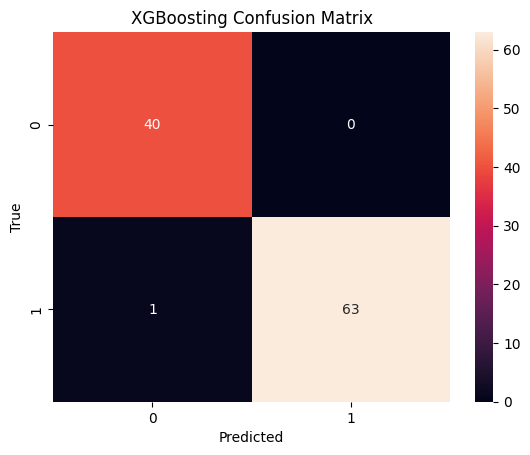

In [11]:
sns.heatmap(confusion_matrix(val_Y,xgb_predictions), annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBoosting Confusion Matrix')
plt.show()

Training Model Random Forest

In [12]:
rf_model=RandomForestClassifier(random_state=2,n_estimators=700)
rf_model.fit(train_X, train_Y)
rf_predictions = rf_model.predict(val_X)
rf_accuracy=accuracy_score(rf_predictions ,val_Y)
rf_sensitivity = np.sum(rf_model.predict_proba(val_X)[:, 1] > 0.5) / len(val_Y)
rf_specificity = np.sum(rf_model.predict_proba(val_X)[:, 0] < 0.5) / len(val_Y)


Confusion Matrix for Random Forest

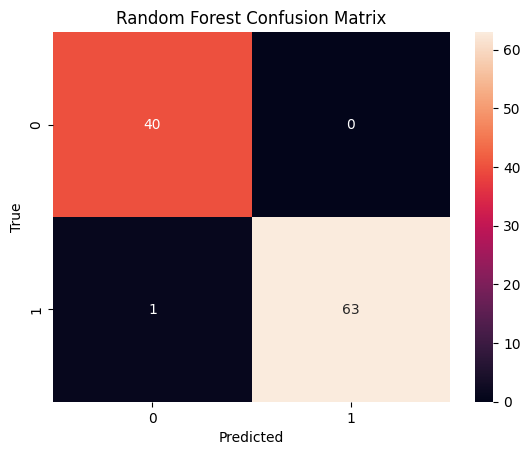

In [13]:
sns.heatmap(confusion_matrix(val_Y,rf_predictions), annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

KNN Classifier

In [14]:
k_range = range(1,21)
scores = {}
scores_list = []
for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(train_X,train_Y)
    knn_prediction=knn_model.predict(val_X)
    scores[k] = metrics.accuracy_score(knn_prediction,val_Y)
    scores_list.append(metrics.accuracy_score(knn_prediction,val_Y))

#after running the code above, assign to n_neighbors the best performing value
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_X,train_Y)
knn_prediction= knn_model.predict(val_X)
knn_accuracy=metrics.accuracy_score(knn_prediction,val_Y)
cm = confusion_matrix(val_Y,knn_prediction)

# Extract TP, TN, FP, FN from the confusion matrix
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate sensitivity (true positive rate)
knn_sensitivity = TP / (TP + FN)

# Calculate specificity (true negative rate)
knn_specificity = TN / (TN + FP)
print(knn_accuracy)
print(knn_sensitivity)
print(knn_specificity)

0.9326923076923077
0.921875
0.95


Confusion Matrix for KNN Classifier

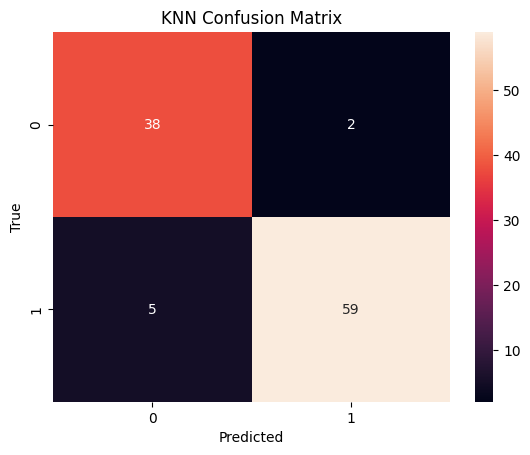

In [15]:
sns.heatmap(confusion_matrix(val_Y,knn_prediction), annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('KNN Confusion Matrix')
plt.show()

Accuracy,Sensitivity, Specificity

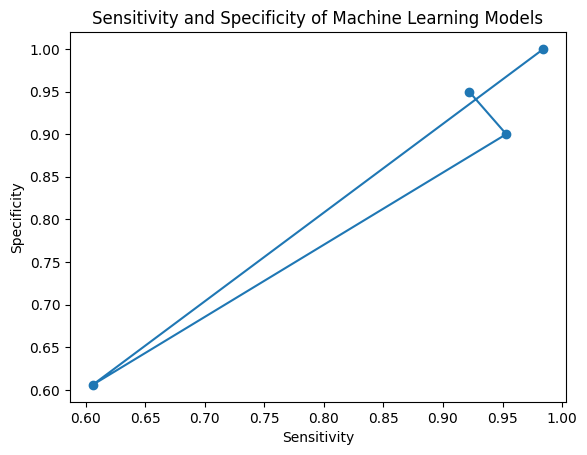

In [16]:



# Create a list of dictionaries to store the results
results = [
    {'Model': 'XGBoosting', 'Sensitivity': xgb_sensitivity, 'Specificity': xgb_specificity},
    {'Model': 'Random Forest', 'Sensitivity': rf_sensitivity, 'Specificity': rf_specificity},
           {'Model': 'SVM', 'Sensitivity': svm_sensitivity, 'Specificity': svm_specificity},
           {'Model': 'KNN', 'Sensitivity': knn_sensitivity, 'Specificity': knn_specificity}
           ]

plt.plot([result['Sensitivity'] for result in results], [result['Specificity'] for result in results], marker='o', linestyle='-')
plt.xlabel('Sensitivity')
plt.ylabel('Specificity')
plt.title('Sensitivity and Specificity of Machine Learning Models')
plt.show()



Voting Ensemble

In [20]:
# Create the voting ensemble
voting_ensemble = VotingClassifier(
    estimators=[('Random Forest', rf_model), ('SVM', svm_model), ('KNN', knn_model),('XGB', xgb_model)],
    voting='hard'  # Use majority voting for classification
)
voting_ensemble.fit(train_X, train_Y)
voting_prediction = voting_ensemble.predict(val_X)
voting_accuracy=metrics.accuracy_score(voting_prediction,val_Y)
cm = confusion_matrix(val_Y, voting_prediction)

# Extract TP, TN, FP, FN from the confusion matrix
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate sensitivity (true positive rate)
voting_sensitivity = TP / (TP + FN)

# Calculate specificity (true negative rate)
voting_specificity = TN / (TN + FP)

print("Sensitivity:", voting_sensitivity)
print("Specificity:", voting_specificity)
print("voting ensamble accuracy",voting_accuracy)

Sensitivity: 0.96875
Specificity: 1.0
voting ensamble accuracy 0.9807692307692307


Bar Plot of all model's Accuracy,Sensitivity and Specificity

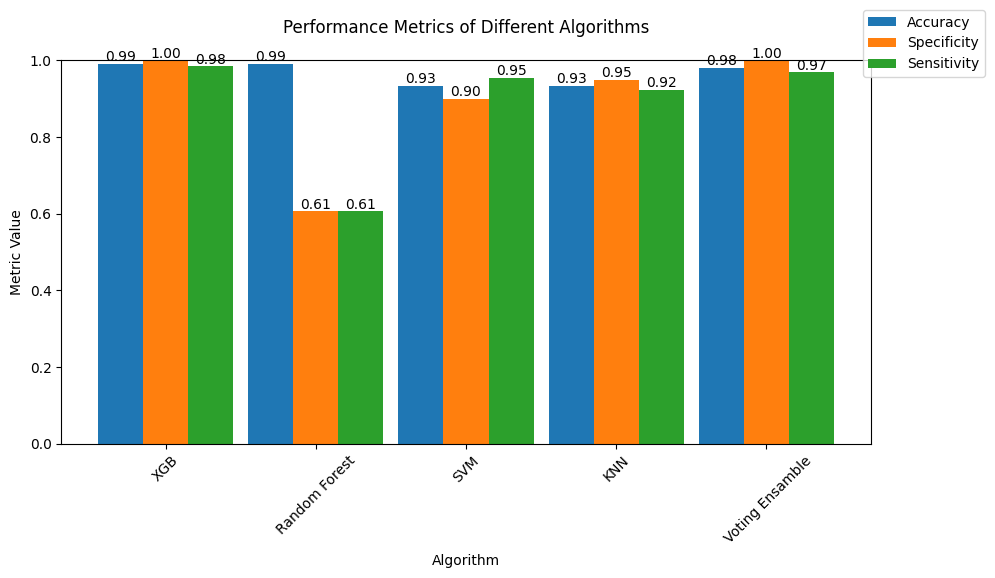

In [21]:
# Assuming you have the accuracy, specificity, and sensitivity values stored in variables
accuracy_values = [xgb_accuracy,rf_accuracy,svm_accuracy,knn_accuracy,voting_accuracy]
specificity_values = [xgb_specificity,rf_specificity,svm_specificity,knn_specificity,voting_specificity]
sensitivity_values = [xgb_sensitivity,rf_sensitivity,svm_sensitivity,knn_sensitivity,voting_sensitivity] 


models = ['XGB', 'Random Forest', 'SVM',"KNN"," Voting Ensamble"] 
plt.figure(figsize=(10, 6))
bar_width = 0.3

accuracy_bars = plt.bar([i - bar_width for i in range(len(models))],accuracy_values, width=bar_width, label='Accuracy')
specificity_bars = plt.bar(range(len(models)), specificity_values, width=bar_width, label='Specificity')
sensitivity_bars = plt.bar([i + bar_width for i in range(len(models))], sensitivity_values, width=bar_width, label='Sensitivity')
for rect in accuracy_bars + specificity_bars + sensitivity_bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.xlabel('Algorithm')
plt.ylabel('Metric Value')
plt.title('Performance Metrics of Different Algorithms', y=1.05)

plt.ylim([0, 1])
plt.xticks(range(len(models)), models, rotation=45)
legend_position = 'upper right'
legend_bbox_to_anchor = (1.15, 1.15)

plt.legend(loc=legend_position, bbox_to_anchor=legend_bbox_to_anchor)
plt.tight_layout()

plt.show()

In [25]:
# Create DataFrames for each model
df_rf = pd.DataFrame({'Prediction':rf_predictions})
df_knn = pd.DataFrame({'Prediction': knn_prediction})
df_svm = pd.DataFrame({'Prediction': SVM_predicition})
df_xgb = pd.DataFrame({'Prediction': xgb_prediction})
df_voting = pd.DataFrame({'Prediction':voting_prediction })

# Calculate counts for each model
diabetic_counts = [df_rf['Prediction'].value_counts()[1], df_knn['Prediction'].value_counts()[1],
                   df_svm['Prediction'].value_counts()[1], df_xgb['Prediction'].value_counts()[1],
                   df_voting['Prediction'].value_counts()[1]]
non_diabetic_counts = [df_rf['Prediction'].value_counts()[0], df_knn['Prediction'].value_counts()[0],
                       df_svm['Prediction'].value_counts()[0], df_xgb['Prediction'].value_counts()[0],
                       df_voting['Prediction'].value_counts()[0]]

# Print the counts for each model
for i, model_name in enumerate(models):
    print(f"{model_name}:")
    print(f"Diabetic count: {diabetic_counts[i]}")
    print(f"Non-Diabetic count: {non_diabetic_counts[i]}")
    print()



XGB:
Diabetic count: 63
Non-Diabetic count: 41

Random Forest:
Diabetic count: 61
Non-Diabetic count: 43

SVM:
Diabetic count: 65
Non-Diabetic count: 39

KNN:
Diabetic count: 63
Non-Diabetic count: 41

 Voting Ensamble:
Diabetic count: 62
Non-Diabetic count: 42

